In [30]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [49]:
# Mapping ClassID to traffic sign names
import csv
signs = []
with open('german-traffic-signs/signnames.csv', 'r') as csvfile:
    signnames = csv.reader(csvfile, delimiter=',')
    next(signnames,None)
    for row in signnames:
        signs.append(row)
    csvfile.close()

In [53]:
from PIL import Image,ImageOps
import os, sys

path = "/home/anurag/now/dl/projects/Recognising Traffic Signs/New_test_images/"
dirs = os.listdir( path )
p = []
pa = []
def predictt(model):
    for item in dirs:
        if os.path.isfile(path+item):
            img = cv2.imread(path+item,0)
            img = cv2.resize(img, (32,32), interpolation = cv2.INTER_CUBIC)
            p.append(signs[model.predict_classes(img.reshape(1, 32, 32, 1))[0]][1])
            pa.append(path+item)

In [56]:
model = pickle.load(open('trained_model.p', 'rb'))
predictt(model)

In [47]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 26,
        }

/home/anurag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


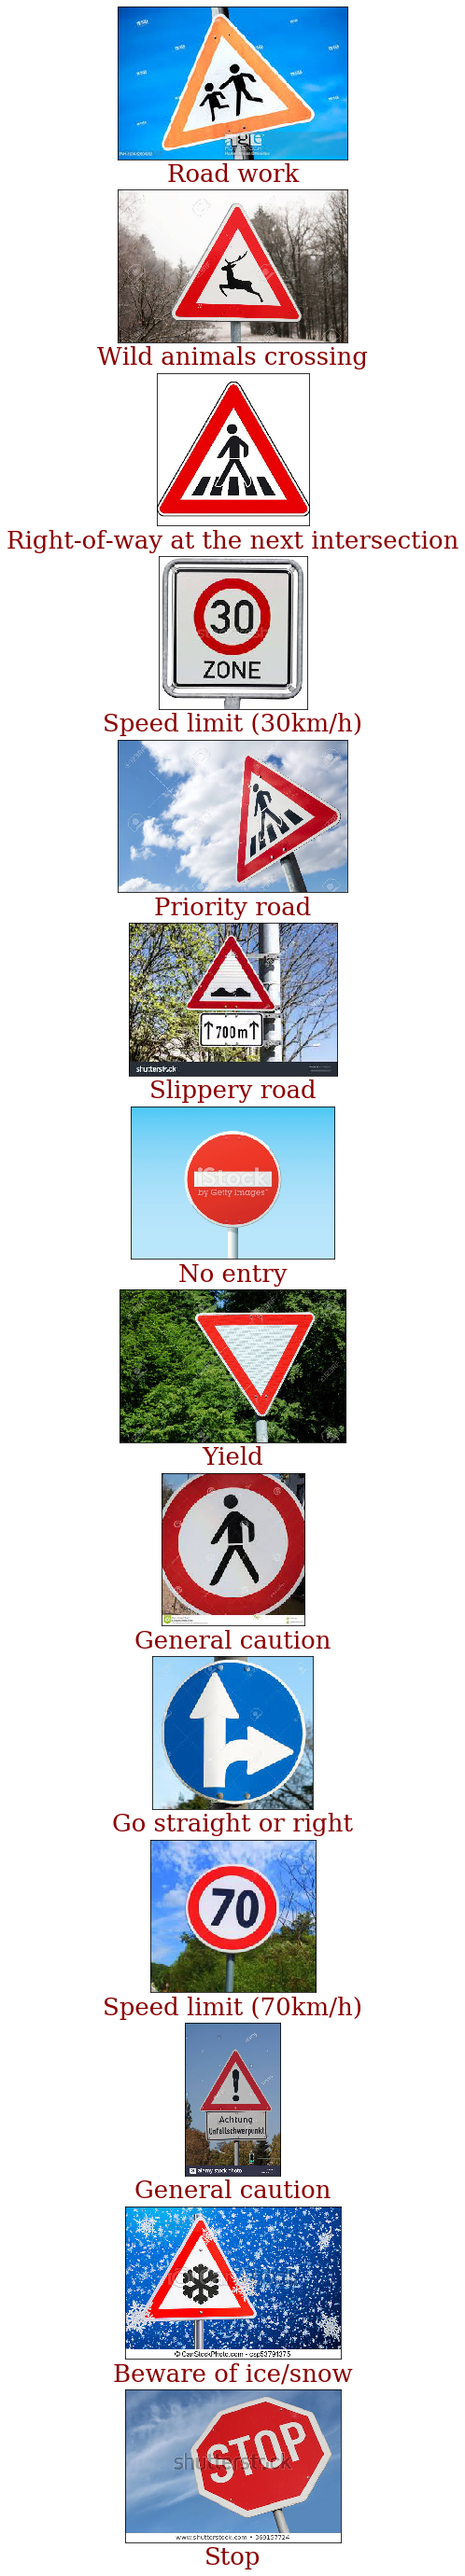

In [57]:
plt.figure(figsize=(50,50))
for i in range(len(dirs)):
    
    plt.subplot(len(dirs),1,i+1)
    img = mpimg.imread(pa[i])
    plt.imshow(img)
    plt.xlabel(p[i],fontdict=font)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout(pad=1000, h_pad=1000, w_pad=1000)

In [69]:
print(pa)

['/home/anurag/now/dl/projects/Recognising Traffic Signs/New_test_images/5.jpg', '/home/anurag/now/dl/projects/Recognising Traffic Signs/New_test_images/2.jpg', '/home/anurag/now/dl/projects/Recognising Traffic Signs/New_test_images/6.jpg', '/home/anurag/now/dl/projects/Recognising Traffic Signs/New_test_images/1.jpg', '/home/anurag/now/dl/projects/Recognising Traffic Signs/New_test_images/4.jpg', '/home/anurag/now/dl/projects/Recognising Traffic Signs/New_test_images/3.jpg']


In [85]:
print(p)

['Speed limit (30km/h)', 'Priority road', 'No entry', 'Yield', 'Go straight or right', 'Stop']
